In [1]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

df = pd.read_csv("../../songs_plus_dates.csv")
data1 = df[df['artist'] == 'Alison Krauss']
data2 = df[df['artist'] == 'Lil Wayne']

In [2]:
df

,Unnamed: 0,song,date,artist,link,text,Genre1,Genre2,number_of_tokens,stemmed_text,POS
0,0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,1381,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...
1,1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,1438,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...
2,2,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,Pop,Rock,1223,make somebodi happi is a question of give and...,happy little sweet sweet tender dumb dumb dumb...
3,3,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,Pop,Rock,1964,down in the street they 're all sing and shou...,alive dead hollow smart sorry last sorry final...
4,4,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,Pop,Rock,1546,chiquitita tell me what 's wrong you 're ench...,wrong own sad quiet sure new new hard sad quie...
...,...,...,...,...,...,...,...,...,...,...,...
24438,24438,Breakin Dishes,2008,Rihanna,/r/rihanna/breakin+dishes_20421653.html,i don't know who you think i am i don't know ...,Pop,Hip Hop,1966,i do n't know who you think i am i do n't kno...,cool hot restless fool baby lil bit flame nigh...
24439,24439,Get It Over With,2012,Rihanna,/r/rihanna/get+it+over+with_21050292.html,it's dark in the day now say now don't compl...,Pop,Hip Hop,1721,it 's dark in the day now say now do n't comp...,dark afraid dry afraid high high high high hig...
24440,24440,Half Of Me,2012,Rihanna,/r/rihanna/half+of+me_21050289.html,you saw me on the television setting fire to ...,Pop,Hip Hop,1315,you saw me on the televis set fire to all the...,dirty own beautiful crazy television fire idea...
24441,24441,Hate That I Love You,2008,Rihanna,/r/rihanna/hate+that+i+love+you_20417853.html,that's how much i love you that's how much i ...,Pop,Hip Hop,1922,that 's how much i love you that 's how much ...,much upset mad wrong much only sad fair right ...


In [57]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(df.POS)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [50]:
data

,Unnamed: 0,Unnamed: 0.1,song,artist,text,stemmed_text,POS,number_of_tokens,Genre1,Genre2,date,decades
0,291,291,Dimming Of The Day,Alison Krauss,this old house is falling down around my ears ...,thi old hous is fall down around my ear I 'm ...,old broken broken house river will dimming day...,809,"Folk, World, & Country",Rock,2012,2010s
1,292,292,Dreaming My Dreams With You,Alison Krauss,i hope that i won't be that wrong anymore i h...,I hope that I wo n't be that wrong anymor I h...,wrong time way mind love hope hope hope find '...,652,"Folk, World, & Country",Rock,1999,1990s
2,293,293,Foolish Heart,Alison Krauss,i think i'll take my foolish heart my friend ...,"I think I 'll take my foolish heart , my frie...",foolish only blue true deep extra many many bl...,1072,"Folk, World, & Country",Rock,1987,1980s
3,294,294,If I Give My Heart,Alison Krauss,if i give my heart to you tonight will you st...,If I give my heart to you tonight will you st...,ours faded ours ours heart tonight side mornin...,770,"Folk, World, & Country",Rock,1987,1980s
4,295,295,In The Palm Of Your Hand,Alison Krauss,if i could have the world and all it owns a t...,If I could have the world and all it own A th...,only selfish little rich poor free rich poor w...,1027,"Folk, World, & Country",Rock,1995,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,5341,5341,Grown Man - Currency,Lil Wayne,lil wayne chea what's up baby i aint tryi...,"( lil wayn ) chea , what 's up babi I aint tr...",grown own manish standard trashcan old young f...,2855,Hip Hop,Electronic,2005,2000s
1294,5342,5342,High Beamin,Lil Wayne,[b.g.] niggas be hating 'cause b.g. got it o...,[ b.g . ] nigga be hate 'caus b.g . got it On...,hot straight clean whole mega hot hot hot hot ...,2714,Hip Hop,Electronic,1999,1990s
1295,5343,5343,Hit Em Up,Lil Wayne,i tried to talk to him quit talkin' i'm a ha...,"I tri to talk to him quit talkin ' , I 'm a h...",hung high own homeless Honest harmless calm cl...,2705,Hip Hop,Electronic,2005,2000s
1296,5344,5344,Hot Nigga,Lil Wayne,[verse:] i'm sorry for the wait nigga i'm ti...,[ vers : ] I 'm sorri for the wait nigga I 'm...,sorry full sorry high dead nigga next oooh new...,2742,Hip Hop,Electronic,2015,2010s


In [58]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [38]:
#X = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_idf)

In [31]:
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(X)

In [52]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(tf_idf_array)
prediction = kmeans.predict(tf_idf_array)

In [53]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=70, cmap='viridis')
plt.title('PCA')
plt.savefig('K_Means/PCA_K-Means_Lyrics.png', bbox_inches = "tight")

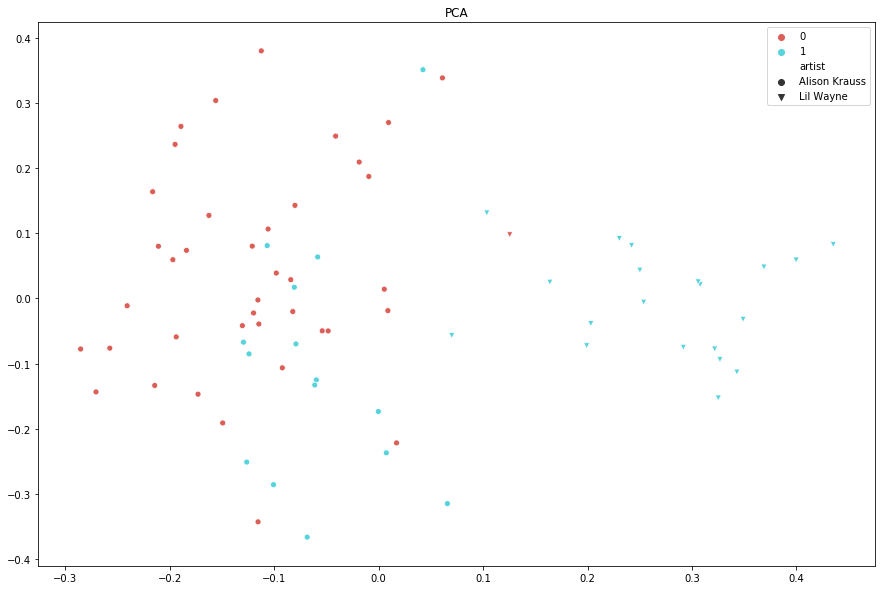

In [59]:
markers = ('o', 'v', 'X', '*', '^')
plt.figure(figsize=(15,10))
sns.scatterplot(Y_sklearn[:, 0], Y_sklearn[:, 1],hue=prediction, style=data.artist, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.title('PCA')
plt.savefig('K_Means/K-Means_Artists.png', bbox_inches = "tight")